In this work I have tried to showcase the housing prices in Californi, datasets are collected from https://github.com/bluebehree/handson-ml/tree/master/datasets/housing

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


* There are 20,640 instance in the dataset, which means that it is fairly small by Machine learning standards. Notice the total_bedrooms attribute has only 20,433 non null values, meaning that 207 disticts are missing this feature. We need to tae care of this later.

* ocean_proximity column were repititive, which means it is probebly a categorical attribute, we will see how many districts belong to each category by using the value_counts() method. 

In [12]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

* Next we will examine the numaric attributes by its summary.

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* From the histogram wecan see that slightly over 800 districts have a median_house_value equal to about $100,000.


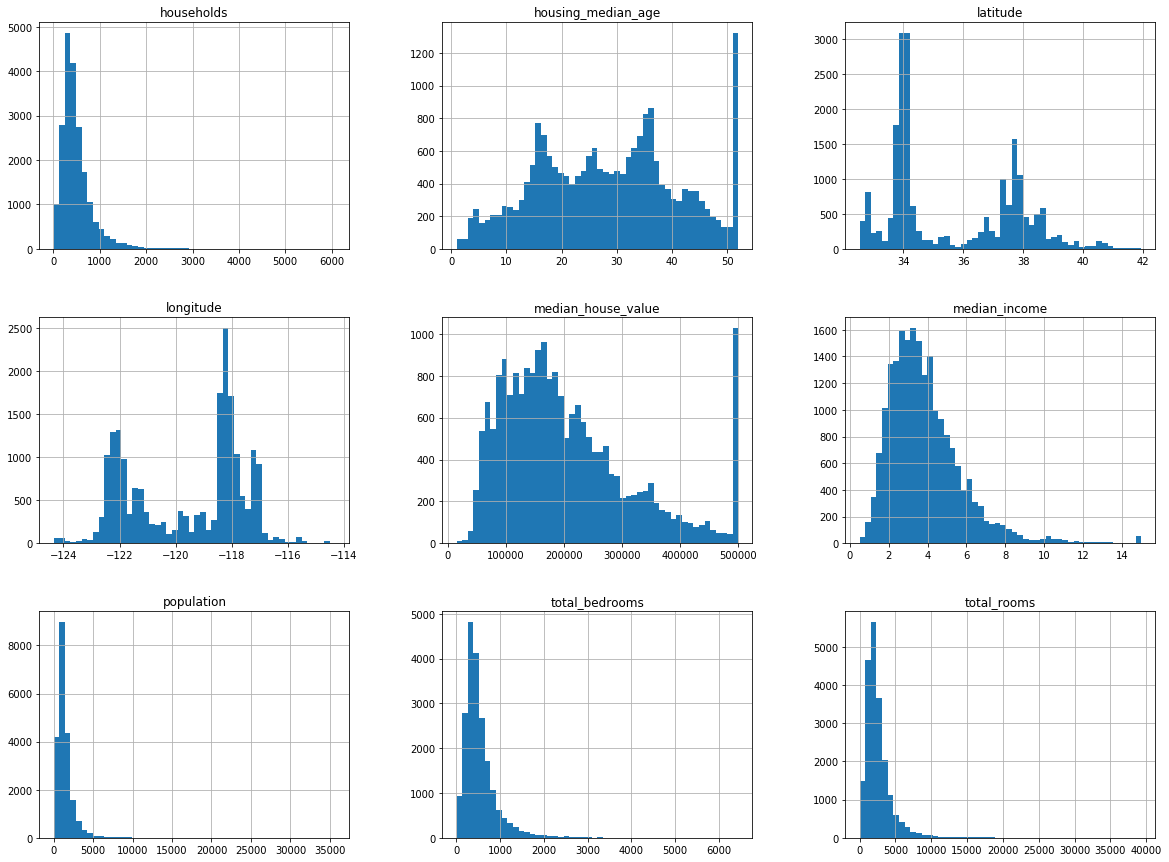

In [29]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

* Since the median income is a very important attribute to predict median housing prices. If we look at the median income histogram more closely most of the median income values are clustered around 2 to 5 (i.e., $20,000 - $50,000), but some median go far beyond 6 ($60,000).

* It is important to have a sufficient number of instances in our dataset for each stratum, or else the estimation of the dataset may baised. This means that we should not have too many strata.

In [41]:
#to limit the number of category, rounding up using ceil to have discrete category
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
# keeping only the category lower then 5 and marging other categorries into category 5
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

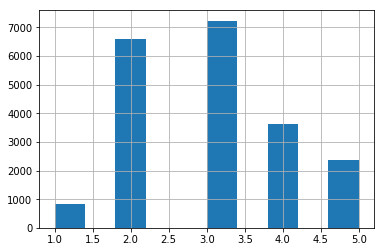

In [40]:
housing['income_cat'].hist()

* Now we are ready to do straified sampling based on income category. Stratified sampling refers to a type of sampling method . With stratified sampling, the population is divided into separate groups, called strata. Then, a probability sample (often a simple random sample) is drawn from each group. 

###### we are going to use scikit-learn's StratifiedShuffleSplit class here.

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

In [47]:
#test set generation
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [48]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [49]:
strat_test_set['income_cat'].describe()

count    4128.000000
mean        3.007267
std         1.054808
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: income_cat, dtype: float64

* Now we should remove the imcome_cat attribute so that the data back to original state.

In [51]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace = True)

* Lets have a look at all the districts of California to visualize the data.

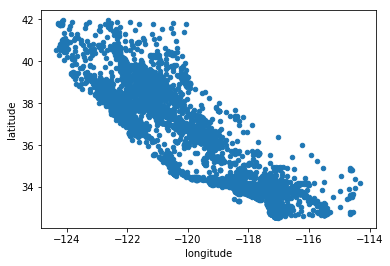

In [54]:
housing.plot(kind='scatter', x='longitude', y='latitude')

* Oh! This is looks like California, but its harder to see where the density means any pertcular pattern.

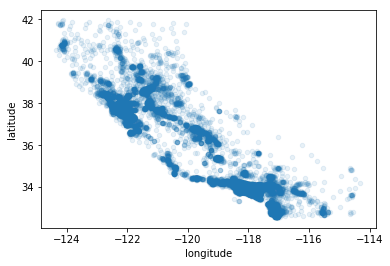

In [57]:
# by setting alpha value 0.1 easy to visualize where there is a high density data points are.
housing.plot(kind= 'scatter', x='longitude',y='latitude',alpha=0.1)

* Now that's much better we can see the clearer view of high density area, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in perticular around Sacramento and Fresno.

* Now let us look at the housing price. The radius of each circle represents the distict's population and the color represents the price.

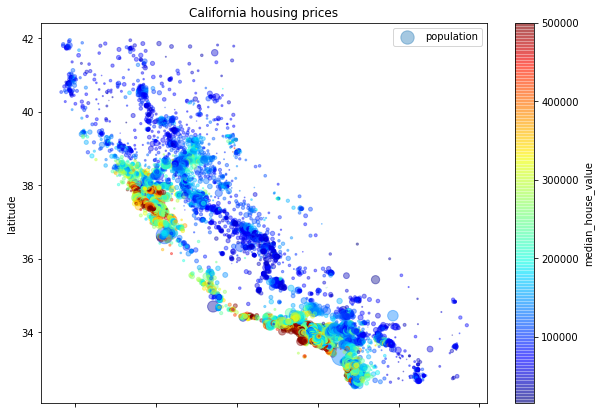

In [64]:
housing.plot(kind= 'scatter', x='longitude',y='latitude',alpha=0.4, 
             s = housing['population']/100,label='population',figsize=(10,7),
                c='median_house_value',cmap=plt.get_cmap('jet'), colorbar=True,
            )
plt.title('California housing prices')
plt.legend()


##### Well well the housing prices are very much related to the location and to the population density 

* From the scatter plot its obvious that the house prise is higher close to the ocean. Ocean proximity attribute is useful is this case. although the house price in norther California near the costal area is not too high.

* Next we will be looking for correlations between attributes:

* i.e., Pearson's r between every pair of attributes.

In [67]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

* The correlation coefficient ranges from 1 to -1. When it is close to 1 that mean there is a strong positive correlation; Here median house value tends to go up when the median income goes up. When coefficient value is close to -1 it means there is a strong negative correlation, we can see there is small negative correlation between latitude and median house value. 

* If we investigate in our plot more we go north the house price goes down.
* and when its zero there will be no linear correlation. 
* Standard correlation coefficient will be something like the below plot of verious datasets:

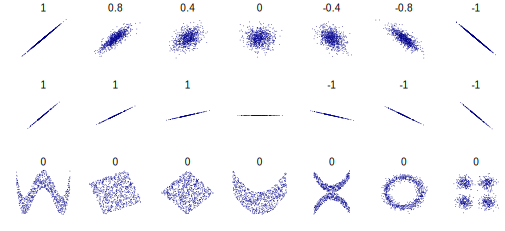

In [68]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

* We can also show this correlation using pandas scatter_matrix function, in this plot we will be focusing on few promising attributes.

In [70]:
from pandas.plotting import scatter_matrix


In [74]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x150E0350>,
      dtype=object)

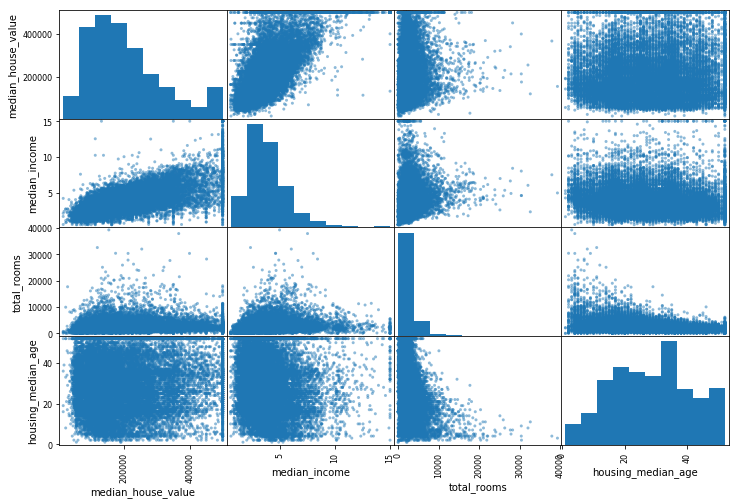

In [75]:
scatter_matrix(housing[attributes],figsize=(12,8))

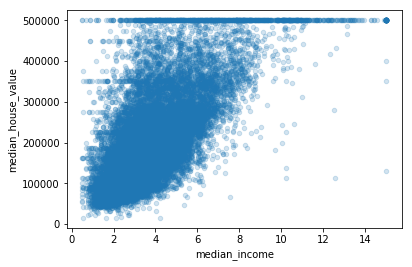

In [78]:
housing.plot(x = 'median_income' , y = 'median_house_value', alpha =0.2, kind='scatter')